In [1]:
import pandas as pd

def read_csv(file_path, columns_to_take):
    print(f'Trying to read Columns: {columns_to_take} from history CSV {file_path}')
    data = pd.read_csv( file_path )[columns_to_take]
    return data

data_path = 'C:/BitBucket/nn_experiments/Python/ZzPythonProject/MarketResearch/Rates_EURUSD_PERIOD_H1.csv'
rates = read_csv(data_path, ['timestamp','open','high','low','close'])

Trying to read Columns: ['timestamp', 'open', 'high', 'low', 'close'] from history CSV C:/BitBucket/nn_experiments/Python/ZzPythonProject/MarketResearch/Rates_EURUSD_PERIOD_H1.csv


In [40]:
data = rates[['timestamp','high', 'low']]

In [43]:
from DeltaZigZag import DeltaZigZag

dzz = DeltaZigZag(0.3)
dzz_res = dzz.calc_zz(data)
data['dzz'] = dzz_res

C:\local\Anaconda3-4.1.1-Windows-x86_64\envs\cntk-py36\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


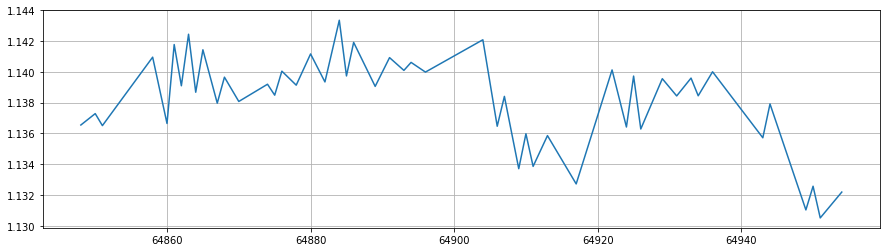

In [44]:
zzplot = data.dzz[data.dzz>0].tail(50)
zzplot.plot(figsize=(15,4), grid=True)
plt.show()

In [32]:
import numpy as np

data['idzz'] = data.dzz.replace(0, np.NAN).interpolate()
data.idzz.tail()

64950    1.13257
64951    1.13051
64952    1.13107
64953    1.13163
64954    1.13219
Name: idzz, dtype: float64

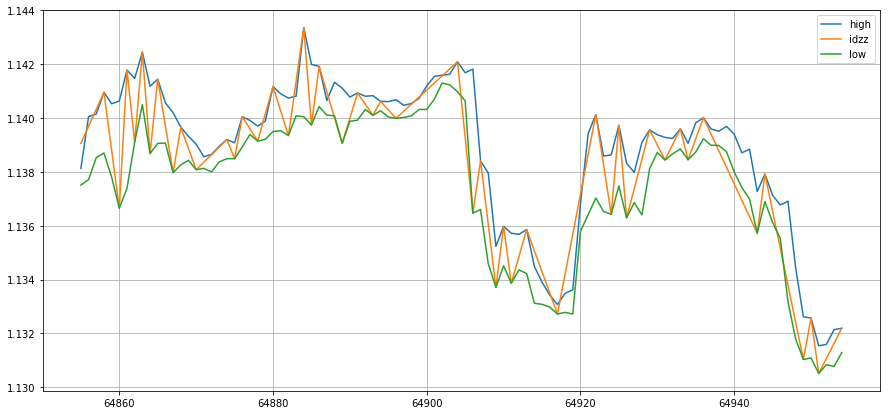

In [35]:
view = data[['high', 'idzz', 'low']].tail(100)
view.plot(figsize=(15,7), grid=True)
plt.show()